### HW1

In [20]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy

In [21]:

def data_loader(file_name):
    mat = scipy.io.loadmat(file_name)
    Xtrain = mat.get('Yt')
    # for the bias
    Xtrain = np.vstack([Xtrain, np.ones(Xtrain.shape[1])]) 
    Ytrain = mat.get('Ct').T
    Xtest = mat.get('Yv')
    Xtest = np.vstack([Xtest, np.ones(Xtest.shape[1])])
    Ytest = mat.get('Cv').T
    return Xtrain, Ytrain, Xtest, Ytest

datasets = ["GMMData","PeaksData","SwissRollData"]
Xtrain, Ytrain, Xtest, Ytest = data_loader(datasets[0])

# Solutions

## Part I
### 1.

In this block we implemented the softmax, the softmax loss and the softmax gradient.\
The parameters:

X - train data of shape (features, observations)\
w - weights dataset of shape (features, labels)\
C - the label data of shape (observations, labels)\
eta - softmax stablizier

In [22]:
def softmax(X, w, eta = True):
    product_Xw = X.T @ w
    if eta==True:
        exp = np.exp(product_Xw - np.max(product_Xw ))
    else:
        exp = np.exp(product_Xw )
    div = np.divide(exp, np.sum(exp, axis = 1).reshape(-1,1))
    print('softmax '+str(div.shape))
    return div

def softmax_loss(X, C, w, eta = True):
    sm = softmax(X, w, eta = eta)
    log  = np.log(sm)
    m = len(X[0])
    return -np.sum(C*log)/m  

def softmax_gradient(X, C, w, eta = True):
    print(C.shape)
    sm= softmax(X, w, eta = eta)
    m = len(X[0])
    gradient = (1/m)*X @ (sm - C)
    print('gradient1'+str(gradient.shape))
    return gradient

Here we check the correctness of the code written above with a gradinet test technique.

In [25]:

def gradient_test(X,C):
    # number of dimensions (features)
    n = X.shape[0]
    # number of labels
    l = C.shape[1]
    
    d = np.random.rand(n,l)
    d = d/np.linalg.norm(d,ord = 1, axis = 0)
    w = np.random.randn(n,l)
    
    loss = softmax_loss(X, C, w, eta = True)
    grad = softmax_gradient(X, C, w, eta = True)
    
    comp1 = []
    comp2 = []
    eps_list = []
    
    eps = 0.5
    for i in range(20):
        
        loss_d = softmax_loss(X, C, w+eps*d, eta = True)
        comp1.append(abs(loss_d  - loss ) )
        comp2.append(abs(loss_d  - loss - ((eps*d.ravel() @ grad.ravel()))))
        eps_list.append(eps)
        eps = 0.5*eps

    plt.plot(comp1,color = 'r')
    plt.plot(comp2, color = 'g')
    plt.legend(["without gradients ", "with gradients "])
    plt.xlabel('eps')
    plt.ylabel('output value')
 #   plt.xticks( range(len(eps_list)),eps_list,rotation = 45)
    plt.yscale('log')
    plt.show()

In [26]:
def gradient_test(X,C):
    # number of dimensions (features)
    n = X.shape[0]
    # number of labels
    l = C.shape[1]

    
    d = np.random.rand(n,l)
    d = d/np.linalg.norm(d,ord = 1, axis = 0)
    w = np.random.rand(n,l)
    
    loss = softmax_loss(X, C, w, eta = True)
    grad = softmax_gradient(X, C, w, eta = True)
    
    comp1 = []
    comp2 = []
    eps_list = []
    
    eps = 0.5
    test_range = list(range(20))
    for i in test_range:
        loss_d = softmax_loss(X, C, w + eps*d , eta = True)
        comp1.append(abs(loss_d  - loss ) )
        comp2.append(abs(loss_d  - loss - (d * eps).ravel() @ grad.ravel()))
        eps_list.append(eps)
        eps *= 0.5

    plt.plot(test_range,comp1,color = 'r')
    plt.plot(test_range,comp2, color = 'g')
    plt.legend(["without gradients ", "with gradients "])
    plt.xlabel('eps')
    plt.ylabel('output value')
    plt.yscale('log')
    plt.xticks( range(len(eps_list)),eps_list,rotation = 45)
    plt.show()

softmax (25000, 5)
(25000, 5)
softmax (25000, 5)
gradient1(6, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)
softmax (25000, 5)


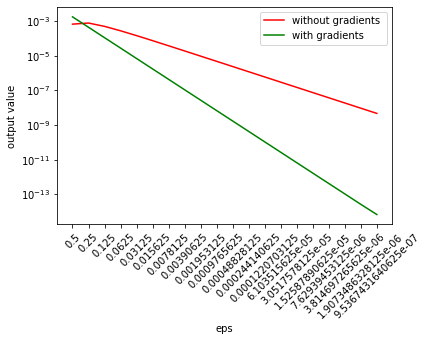

In [27]:
gradient_test(Xtrain ,Ytrain)

In [ ]:
Ytrain.shape